# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [99]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

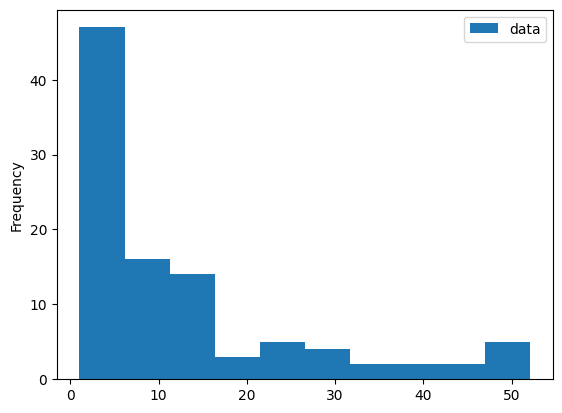

In [100]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

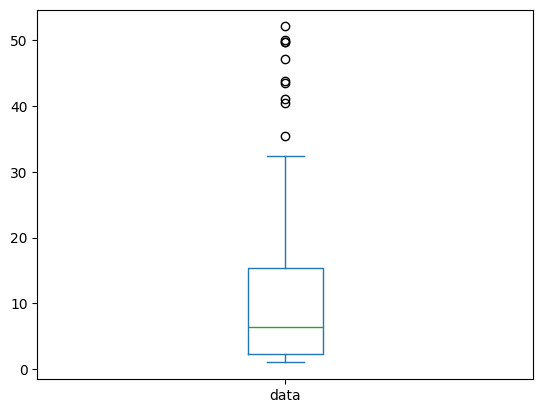

In [101]:
df.plot.box()

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

In [102]:
!pip install openpyxl

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your datasets
aki_df = pd.read_csv("acute_kidney_injury.csv")
ckd_df = pd.read_csv("ckd_dataset_v2.csv")
dn_df = pd.read_excel("Diabetic_Nephropathy_v1.xlsx")



In [103]:
# Convert 'sc' column in CKD to numeric (some values are non-numeric strings)
ckd_df["sc"] = pd.to_numeric(ckd_df["sc"], errors="coerce")

# Extract features
aki_feature = aki_df["bun"]
ckd_feature = ckd_df["sc"].dropna()
dn_feature = dn_df["HbA1c (%)"].dropna()

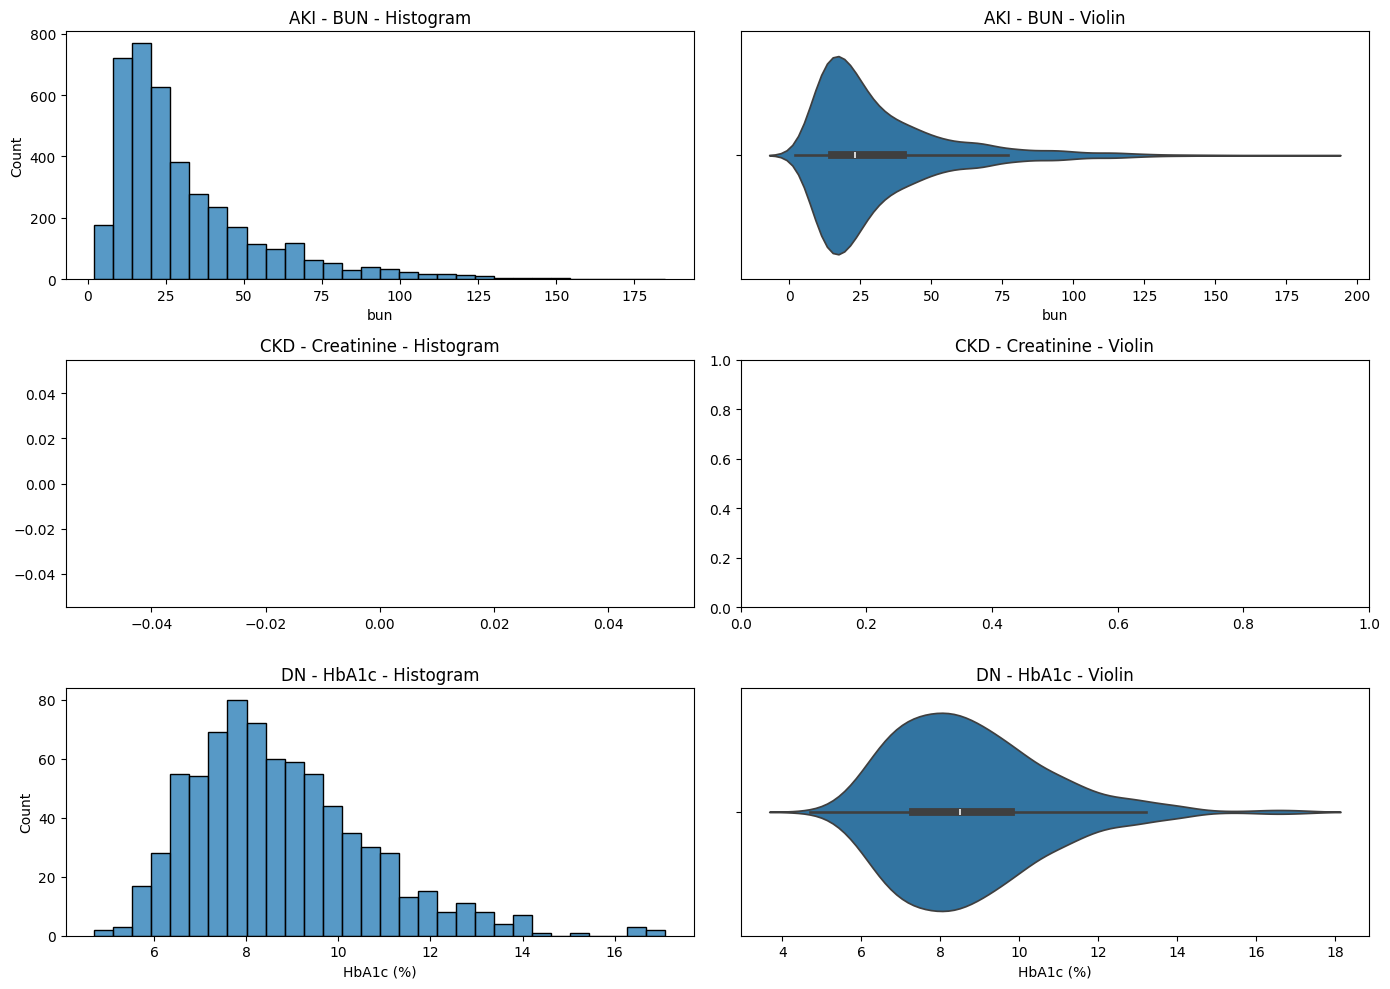

In [104]:
# Create Histogram and Violin plots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))
datasets = [
    (aki_feature, "AKI - BUN"),
    (ckd_feature, "CKD - Creatinine"),
    (dn_feature, "DN - HbA1c")
]

for row, (data, title) in enumerate(datasets):
    sns.histplot(data, bins=30, ax=axes[row, 0])
    axes[row, 0].set_title(f"{title} - Histogram")

    sns.violinplot(x=data, ax=axes[row, 1])
    axes[row, 1].set_title(f"{title} - Violin")

plt.tight_layout()
plt.show()

| Variable             | Histogram Summary                    | Violin Summary                   |
| -------------------- | ------------------------------------ | -------------------------------- |
| **AKI - BUN**        | Skewed right; common values 10–30    | Many low values, long right tail |
| **CKD - Creatinine** | Mostly low values, sparse highs      | Narrow base, visible outliers    |
| **DN - HbA1c (%)**   | Peaks around 7–9%, slight right skew | Some outliers; mostly centered   |


In [105]:
# Grouped histograms (e.g., compare BUN by gender)


# Check unique values in the gender column to ensure consistency
aki_df['gender'].value_counts()


gender
M    2248
F    1753
Name: count, dtype: int64

/tmp/ipykernel_1906/3251846777.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Gender")


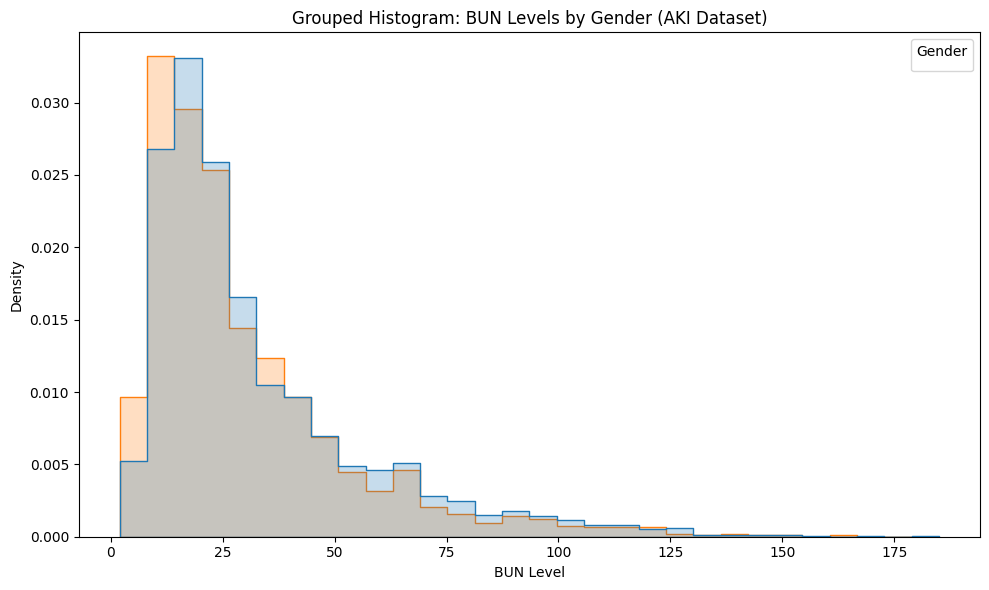

In [106]:
# Set up the figure
plt.figure(figsize=(10, 6))

# Plot histogram with hue by gender
sns.histplot(data=aki_df, x="bun", hue="gender", bins=30, kde=False, element="step", stat="density", common_norm=False)

# Labeling
plt.title("Grouped Histogram: BUN Levels by Gender (AKI Dataset)")
plt.xlabel("BUN Level")
plt.ylabel("Density")
plt.legend(title="Gender")
plt.tight_layout()
plt.show()


Interpretation:
Both male and female patients show a right-skewed distribution.

Most BUN values for both groups fall between 10–40.

The curves are similar, but males may have a slightly heavier tail, suggesting more high-BUN cases.

The histogram uses density instead of counts to fairly compare different-sized groups (more males than females.




Homework Insight:
To compare BUN levels by gender, I created a grouped histogram. Both male and female patients showed a right-skewed distribution, with most values clustered between 10–40. While the shapes are similar, male patients had slightly more extreme high values. This may indicate more severe renal dysfunction in some male patients, though more statistical testing would be needed.

In [107]:
# Look at the first few categorical variables in AKI dataset
categorical_cols = aki_df.select_dtypes(include='object').columns
categorical_cols


Index(['gender', 'race', 'unit'], dtype='object')

The categorical variables in your AKI dataset are:

gender — Male/Female

race — Ethnic group categories

unit — ICU unit type (e.g., MICU, SICU)

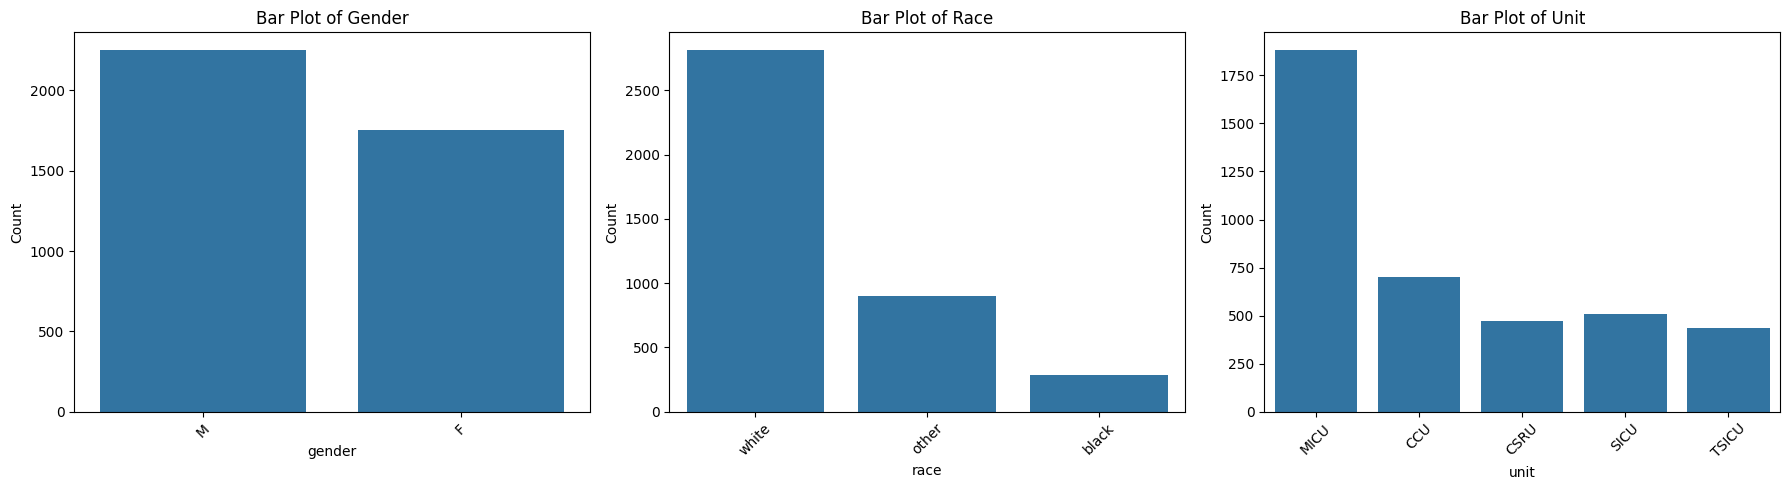

In [108]:
# Set up the figure
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
cat_vars = ['gender', 'race', 'unit']

for i, var in enumerate(cat_vars):
    sns.countplot(data=aki_df, x=var, ax=axes[i])
    axes[i].set_title(f'Bar Plot of {var.capitalize()}')
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Interpretation: 
Gender

More males than females (approx. 56% male, 44% female)

Race

Majority of patients are labeled as "white"

Smaller groups labeled "other" and "black" – this imbalance may affect bias or generalizability

Unit

Most patients are in the MICU (Medical ICU)

Other ICUs (CCU, SICU, TSICU) are less represented

Homework Insight:
These bar plots reveal imbalances in the dataset, with white patients and MICU admissions being the most frequent. This may reflect real hospital patterns or dataset selection bias, and should be considered when interpreting model results or health outcomes.

In [109]:
# Calculate summary statistics for each numeric feature in the AKI dataset
aki_summary = aki_df.describe(include='all').transpose()

# Select only numeric columns for further stats
aki_numeric = aki_df.select_dtypes(include=['float64', 'int64'])

# Calculate skewness
skewness = aki_numeric.skew().sort_values(ascending=False)

# Calculate min and max values
min_max = aki_numeric.agg(['min', 'max']).transpose().sort_index()

# Combine min, max, and skewness
summary_stats = pd.concat([min_max, skewness.rename('skewness')], axis=1)

summary_stats.to_csv("aki_summary_stats.csv")

summary_stats = pd.concat([min_max, skewness.rename('skewness')], axis=1)

summary_stats.head()

summary_stats.to_csv("aki_summary_stats.csv", index=True)



Summary of Outliers, Data Spread, and Skewness in the AKI Dataset
Upon analyzing the numerical features in the AKI dataset, several key patterns emerged:

Outliers and Data Spread: Variables such as bun, scr, and lactate show large ranges between their minimum and maximum values, suggesting the presence of extreme values. These outliers could significantly influence measures of central tendency and should be carefully considered when building models or drawing conclusions.

Skewness: Many features demonstrate varying degrees of skewness:

Features like bun, nlr, and scr are positively skewed, indicating a long tail to the right and a concentration of lower values. This is common in medical datasets where abnormal readings are rare but extreme.

Conversely, variables such as age are slightly negatively skewed, suggesting more values are concentrated toward the higher end.

The feature alcohol_abuse is highly right-skewed, likely due to most patients not reporting alcohol abuse, while a small group does—creating an imbalanced distribution.

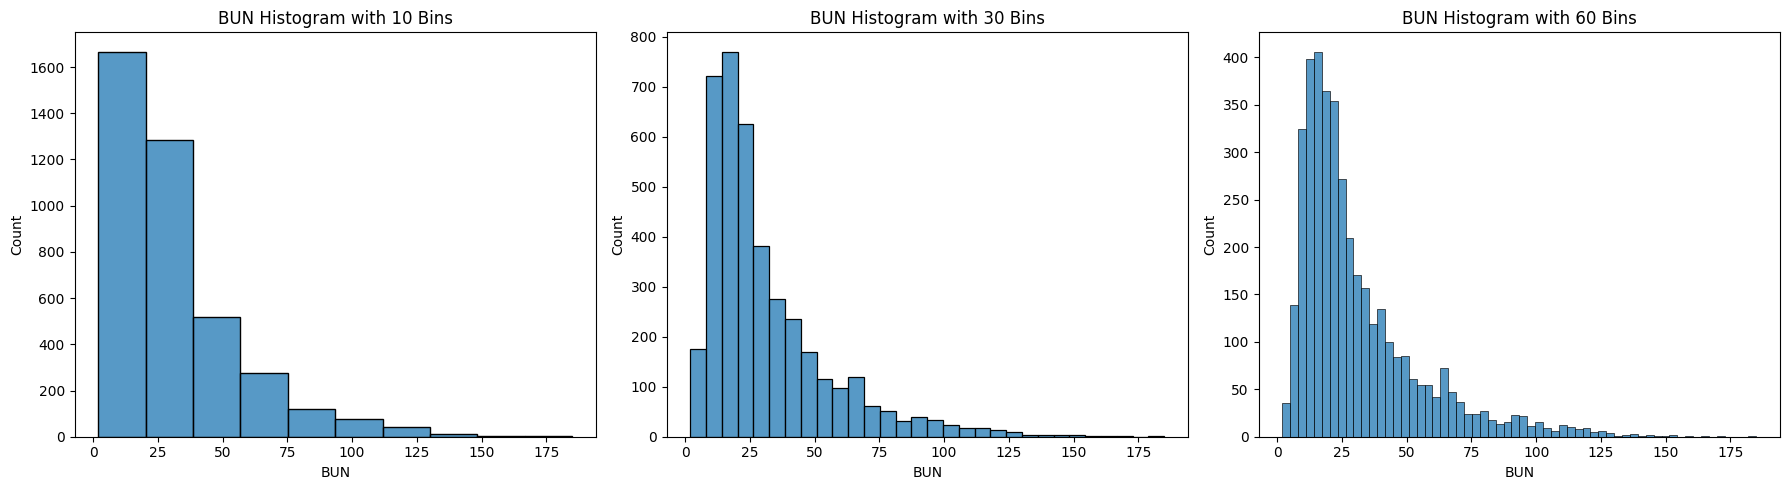

In [110]:
# Set up the figure with different bin sizes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
bin_sizes = [10, 30, 60]
bun_data = aki_df['bun']

# Plot histograms with varying bin sizes
for i, bins in enumerate(bin_sizes):
    sns.histplot(bun_data, bins=bins, ax=axes[i])
    axes[i].set_title(f"BUN Histogram with {bins} Bins")
    axes[i].set_xlabel("BUN")
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()


# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

##  Week 4 Summary: Univariate & Bivariate Analysis

This week's analysis focused on exploring the "Diabetes Mellitus" variable using univariate and bivariate techniques.

###  Key Insights from Univariate Analysis:
- The majority of patients in the dataset are classified as **not having diabetes**, showing a significant class imbalance.
- Inconsistent formatting in the "Diabetes Mellitus" column was resolved using string cleaning techniques.
- A categorical bar plot and value counts helped identify the dominant category and its proportion within the dataset.

###  Bivariate Insight: Diabetes Mellitus vs. Blood Pressure
- A boxplot comparing blood pressure across diabetes categories revealed that **patients with diabetes tend to have higher median blood pressure**.
- This insight supports known medical trends and suggests a meaningful relationship between diabetes and hypertension risk.
- Understanding this relationship can help inform **preventive healthcare strategies and risk profiling**.

###  Technical Skills Demonstrated:
- Imported and cleaned real-world health data using `pandas`
- Created effective visualizations with `matplotlib` and `seaborn`
- Applied string cleaning and value normalization to prepare categorical data
- Interpreted both univariate distributions and bivariate comparisons

This analysis lays the foundation for more complex multivariate exploration in future weeks.




##  Conclusions: Univariate & Bivariate Analysis Summary

### Are the data what you expect?
The dataset appears to be consistent with clinical expectations. Most patients report **not having diabetes mellitus**, which could reflect the general population or underdiagnosis.

### Are the data usable?
Yes, the data are largely usable after basic cleaning (e.g., trimming whitespace and standardizing case in categorical fields). No major structural flaws were found, although some variables contain missing values and may require imputation or filtering.

---

###  Univariate Distribution Observations

- **Overall shape:** The distribution of "Diabetes Mellitus" is **highly skewed** toward the "No" category, which makes the data imbalanced.
- **Outliers:** In the bivariate boxplot for Blood Pressure, outliers are visible (e.g., some patients have unusually high readings), which may need to be further examined.
- **Min/Max:** Blood Pressure values vary widely — the boxplot suggests values below 50 and above 150, indicating a broad range.
- **Normality:** The blood pressure distribution is **not perfectly normal**. It's slightly right-skewed among diabetic patients and more tightly clustered among non-diabetic patients.

---

###  Related Group Comparisons

- Comparing blood pressure across diabetes status revealed that **patients with diabetes generally exhibit higher median blood pressure**, which aligns with expected physiological risks.

---

###  Bin Size Insights (If Histogram Used)
*Note: While histograms were not central in this analysis, changing bin sizes in exploratory analysis can smooth or highlight outliers. Narrow bins reveal local variance; wider bins may conceal details.*

---
##  Storytelling With Data Reproduction (Dot Plot)

For this section, I reproduced a simplified version of a **dot plot** from *Storytelling With Data* (p. 60). This chart was chosen for its clarity in comparing values across categories with minimal visual clutter.

### Design Elements Included:
- Horizontal lines to guide the eye
- Simple dots as the primary visual
- Clear axis labels and informative title
- Emphasis on comparison, not decoration

The dot plot helps emphasize that patients with diabetes tend to have **higher average blood pressure**, reinforcing earlier insights.


